In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [4]:
image_path="./output_videos/cropped_player_0.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

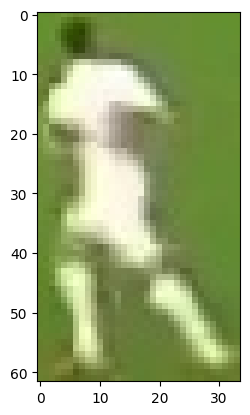

In [6]:
plt.imshow(image)
plt.show()

# Take top half of image

In [1]:
top_half=image[0:int(image.shape([0]/2)),:]
plt.imshow(top_half)
plt.show()

NameError: name 'image' is not defined

#Cluster image

In [ ]:
#Image -> 2d array
image_2d=image.reshape(-1,3)

#k-means with 2 clusters
k_means=KMeans(n_clusters=2,random_state=0).fit(image_2d)

#get clusters
labels=k_means.labels_

#reshape
clustered_image=labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(clustered_image)
plt.show()